In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df_issues_per_contributor = pd.read_csv('data_processed/issues_per_contributor.csv')
df_issues_per_contributor.head()

,contributor,issues_count
0,numpy-gitbot,1595
1,thouis,611
2,charris,382
3,eric-wieser,307
4,seberg,201


### Top 15 contributors with the most issues

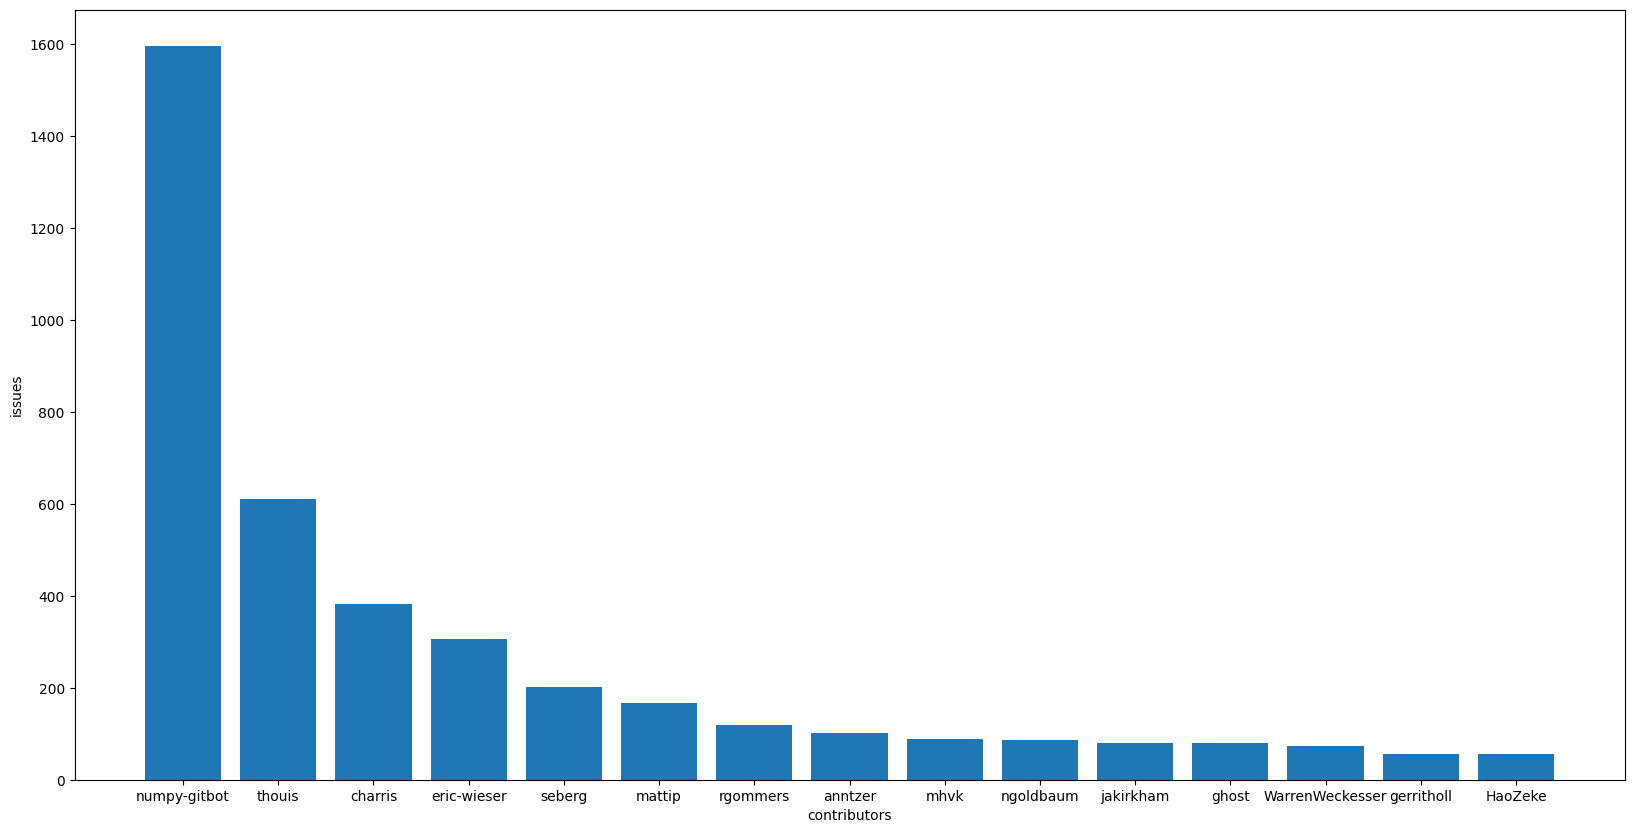

In [4]:
df_top_contributors = df_issues_per_contributor.sort_values(by='issues_count',ascending=False).head(15)

X = df_top_contributors['contributor']
Y = df_top_contributors['issues_count']
plt.figure(figsize=(20,10))
plt.bar(X,Y)
plt.xlabel("contributors")
plt.ylabel("issues")
plt.show()

In [5]:
df_issues = pd.read_csv('data_processed/issues_cleaned.csv')

### Sum of issues

##### 1.Sum of closed issues

In [6]:
len(df_issues[df_issues['state']=='closed'])

10906

##### 2.Sum of open issues

In [7]:
len(df_issues[df_issues['state']=='open'])

1973

### A number of issues over the years

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23840\2463592020.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=issues_by_year.index, y=issues_by_year.values, palette="Blues_d")


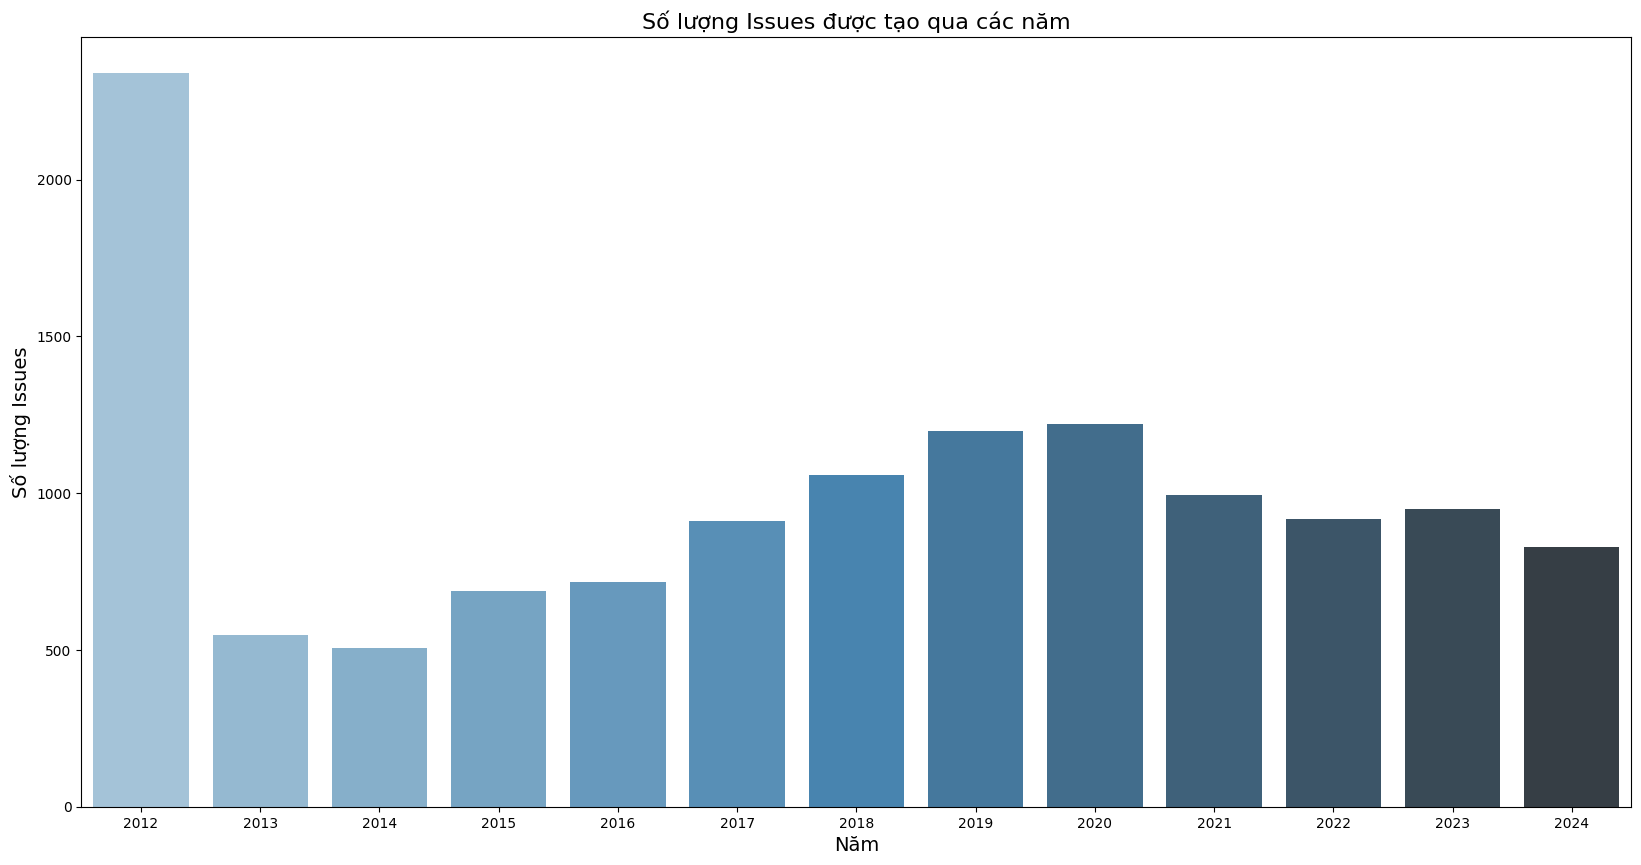

In [8]:
df_issues['created_at'] = pd.to_datetime(df_issues['created_at'])
year_issues = df_issues['created_at'].dt.year

issues_by_year = year_issues.value_counts().sort_index()

plt.figure(figsize=(20, 10))

# Vẽ biểu đồ cột
sns.barplot(x=issues_by_year.index, y=issues_by_year.values, palette="Blues_d")

# Thêm tiêu đề và nhãn
plt.title('Số lượng Issues được tạo qua các năm', fontsize=16)
plt.xlabel('Năm', fontsize=14)
plt.ylabel('Số lượng Issues', fontsize=14)

# Hiển thị biểu đồ
plt.show()

### A number of open issues over the months from 2012 to 2024

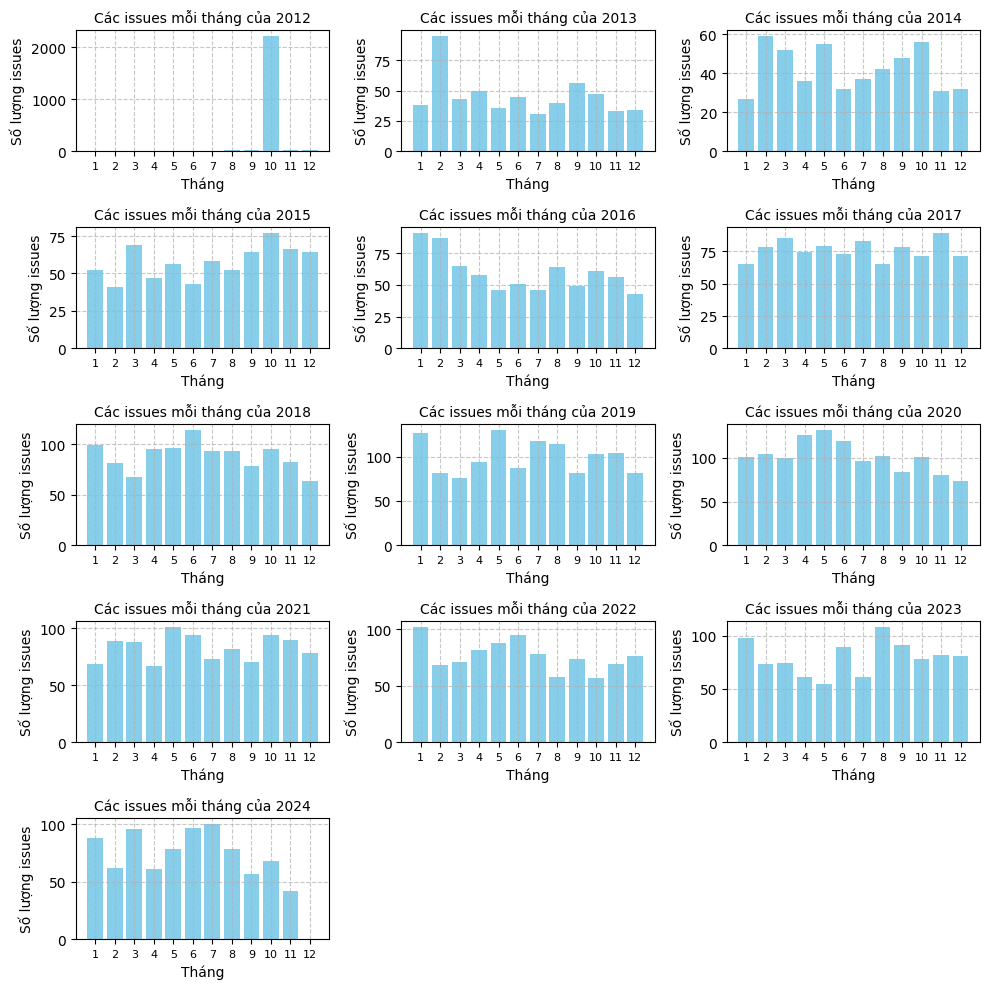

In [ ]:
import math
df_issues['year'] = df_issues['created_at'].dt.year
df_issues['month'] = df_issues['created_at'].dt.month

months_count_issues = df_issues.groupby(['year','month']).size().unstack(fill_value=0)

years = months_count_issues.index

n_cols = 3
n_rows = math.ceil(len(years) / n_cols)  


fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 2 * n_rows))


axes = axes.flatten()

# Vẽ từng biểu đồ
for i, year in enumerate(years):
    axes[i].bar(months_count_issues.columns, months_count_issues.loc[year], color='skyblue')
    axes[i].set_title(f'Các issues mỗi tháng của {year}', fontsize=10)
    axes[i].set_xlabel('Tháng', fontsize=10)
    axes[i].set_ylabel('Số lượng issues', fontsize=10)
    axes[i].set_xticks(range(1, 13))  # Các tháng từ 1 đến 12
    axes[i].set_xticklabels(['1', '2', '3', '4', '5', '6', 
                             '7', '8', '9', '10', '11', '12'], fontsize=8)
    axes[i].grid(True, linestyle='--', alpha=0.7)


for j in range(len(years), len(axes)):
    axes[j].axis('off')


plt.tight_layout()


plt.show()

### Top issues have the most comments

In [14]:
pd.set_option('display.max_colwidth', 200)
sort_comment_issues = df_issues.sort_values(by='comment',ascending=False)
sort_comment_issues[['number','labels','comment']].head(20)

,number,labels,comment
9264,5844,"['component: numpy._core', '54 - Needs decision']",328
9448,5479,['component: distribution'],267
4215,16744,"['00 - Bug', '32 - Installation']",182
5627,13635,"['15 - Discussion', 'component: numpy.random']",166
10056,4007,['component: numpy.linalg'],155
579,26191,['Tracking / planning'],136
7226,10161,['57 - Close?'],118
4398,16313,['component: numpy.random'],106
8613,7372,"['15 - Discussion', 'component: build']",98
3796,17807,['component: build'],97
